### 1. Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the dataset
df = pd.read_csv("blogs_categories.csv")

In [4]:
# Exploratory Data Analysis
print(df.head())

   Unnamed: 0                                               Data       Labels
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB
None


In [6]:
print(df.describe())

         Unnamed: 0
count  19997.000000
mean    9998.000000
std     5772.781002
min        0.000000
25%     4999.000000
50%     9998.000000
75%    14997.000000
max    19996.000000


In [7]:
print(df['Labels'].value_counts())

alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: Labels, dtype: int64


In [8]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
Data          0
Labels        0
dtype: int64


In [9]:
# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


In [11]:
df['Data'] = df['Data'].apply(preprocess_text)

In [12]:
# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Data'])
y = df['Labels']

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Naive Bayes Model for Text Classification

In [14]:
# Implement Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

### 3. Sentiment Analysis

In [18]:
from textblob import TextBlob

In [19]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [20]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [21]:
# Analyze the distribution of sentiments
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_distribution)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism               0.286000    0.000  0.714000
comp.graphics             0.260000    0.001  0.739000
comp.os.ms-windows.misc   0.260000    0.001  0.739000
comp.sys.ibm.pc.hardware  0.252000    0.001  0.747000
comp.sys.mac.hardware     0.264000    0.000  0.736000
comp.windows.x            0.282000    0.005  0.713000
misc.forsale              0.248000    0.000  0.752000
rec.autos                 0.244000    0.002  0.754000
rec.motorcycles           0.332000    0.000  0.668000
rec.sport.baseball        0.327000    0.000  0.673000
rec.sport.hockey          0.373000    0.000  0.627000
sci.crypt                 0.274000    0.000  0.726000
sci.electronics           0.251000    0.000  0.749000
sci.med                   0.278000    0.002  0.720000
sci.space                 0.271000    0.001  0.728000
soc.religion.christian    0.225677    0.000  0.774323
talk.politics.guns        0.

### 4. Evaluation

In [22]:
# Evaluate the Naive Bayes Classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [23]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.89425
Precision: 0.8934047603502218
Recall: 0.89425
F1-score: 0.8926119876486682

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.76       173
           comp.graphics       0.86      0.90      0.88       179
 comp.os.ms-windows.misc       0.94      0.87      0.90       226
comp.sys.ibm.pc.hardware       0.84      0.84      0.84       204
   comp.sys.mac.hardware       0.89      0.96      0.92       205
          comp.windows.x       0.97      0.94      0.95       186
            misc.forsale       0.90      0.78      0.83       190
               rec.autos       0.91      0.94      0.92       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.88      0.98      0.93       200
         sci.electronic

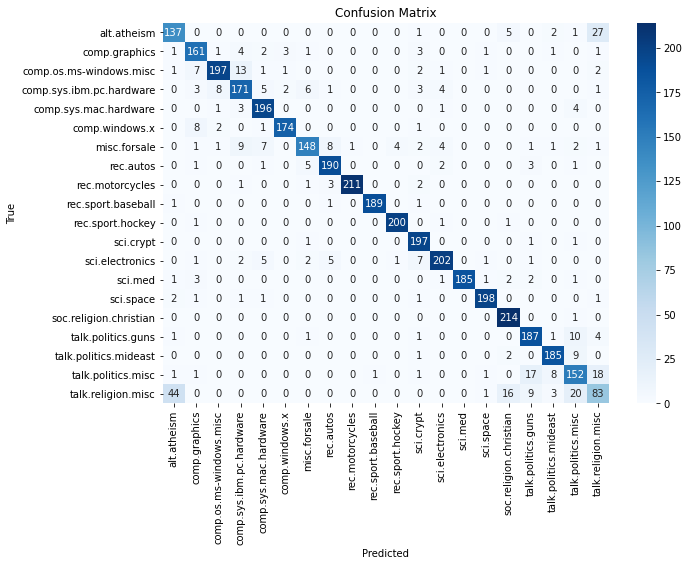

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()